============================================================
### EXPLORATORY DATA ANALYSIS (EDA)
============================================================

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Global settings for cleaner visuals
sns.set(style="whitegrid", font_scale=1.0)
plt.rcParams['figure.figsize'] = (10, 5)

#### 1. Basic Info and Quick Overview

In [4]:
df = pd.read_csv("../04-data/combined/all_cars_combined.csv")

print("Shape:", df.shape)
print("\nDtypes:")
display(df.dtypes)

print("\nPeek:")
display(df.head(3))

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("\nNumeric columns:", num_cols)

print("\nDescribe (numeric):")
display(df[num_cols].describe().T)

Shape: (108540, 10)

Dtypes:


brand            object
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object


Peek:


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4



Numeric columns: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

Describe (numeric):


,count,mean,std,min,25%,50%,75%,max
year,108540.0,2017.098028,2.130057,1970.0,2016.00,2017.0,2019.0,2060.0
price,108540.0,16890.124046,9756.266820,450.0,10229.50,14698.0,20940.0,159999.0
mileage,108540.0,23025.928469,21176.423684,1.0,7491.75,17265.0,32236.0,323000.0
tax,94327.0,120.256183,63.404805,0.0,125.00,145.0,145.0,580.0
mpg,99187.0,55.166825,16.138522,0.3,47.10,54.3,62.8,470.8
engineSize,108540.0,1.661644,0.557058,0.0,1.20,1.6,2.0,6.6


#### 2. Missing Value Analysis


==== Missing Value Percentage ====
tax    13.094712
mpg     8.617100
dtype: float64


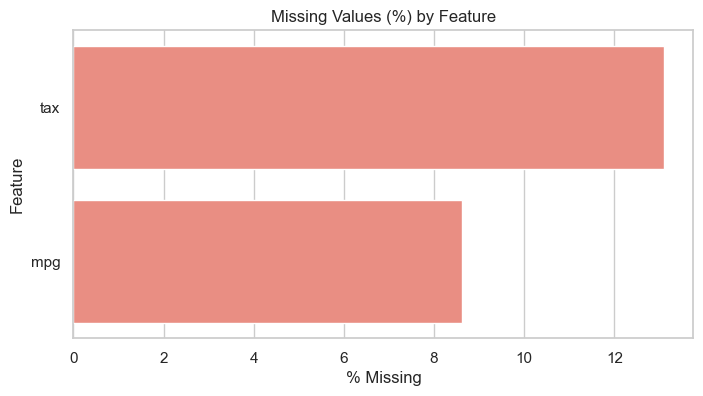


==== Checking if Missingness is Informative ====


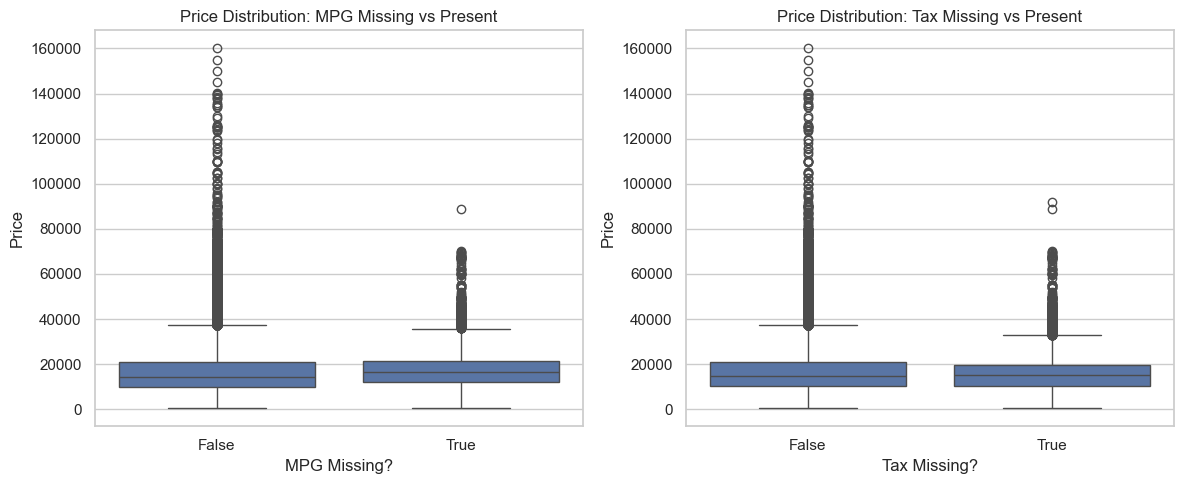

→ Since the price distributions does not differ significantly based on the presence of MPG and Tax values, the missingness is likely random.


In [5]:
print("\n==== Missing Value Percentage ====")
missing_percent = df.isna().mean().sort_values(ascending=False) * 100
print(missing_percent[missing_percent > 0])


plt.figure(figsize=(8,4))
sns.barplot(x=missing_percent[missing_percent > 0], y=missing_percent[missing_percent > 0].index, color='salmon')
plt.title('Missing Values (%) by Feature')
plt.xlabel('% Missing')
plt.ylabel('Feature')
plt.show()


# --- 3. Missingness Patterns (MPG & Tax) ---
print("\n==== Checking if Missingness is Informative ====")
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=df['mpg'].isna(), y=df['price'], ax=axes[0])
axes[0].set_title('Price Distribution: MPG Missing vs Present')
axes[0].set_xlabel('MPG Missing?')
axes[0].set_ylabel('Price')


sns.boxplot(x=df['tax'].isna(), y=df['price'], ax=axes[1])
axes[1].set_title('Price Distribution: Tax Missing vs Present')
axes[1].set_xlabel('Tax Missing?')
axes[1].set_ylabel('Price')
plt.tight_layout()
plt.show()


print("→ Since the price distributions does not differ significantly based on the presence of MPG and Tax values, the missingness is likely random.")

#### 3. Univariate Distributions (Numeric Features)

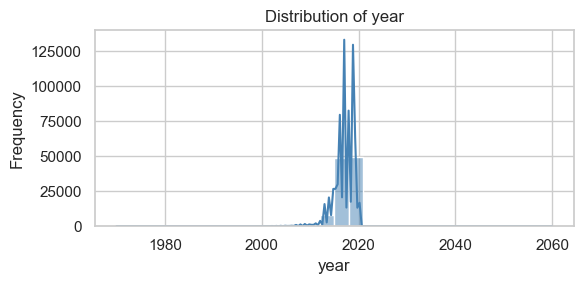

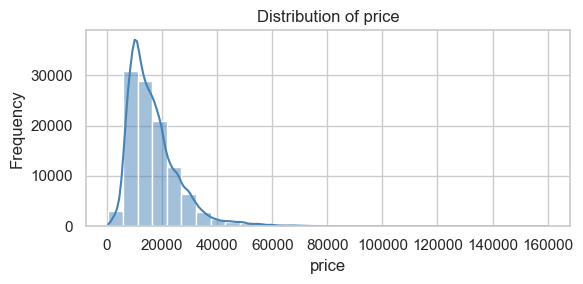

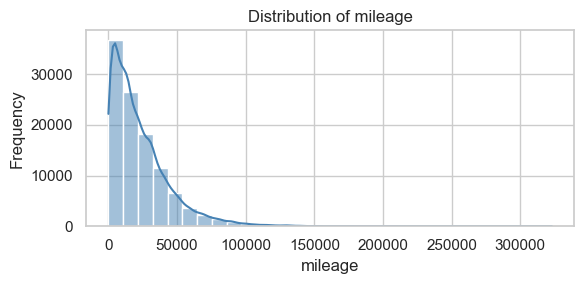

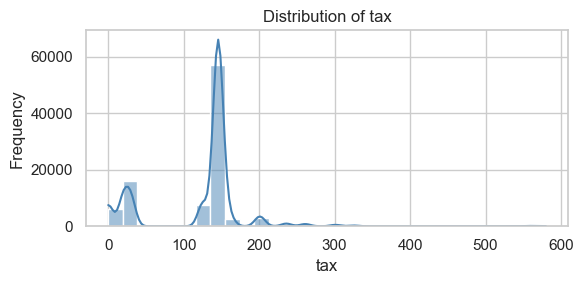

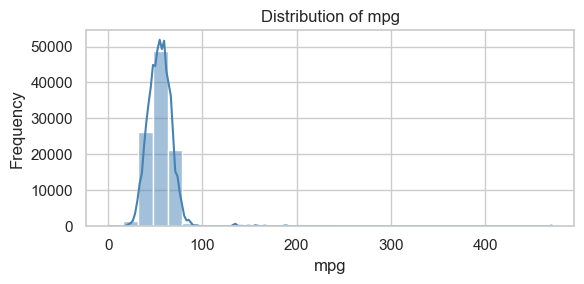

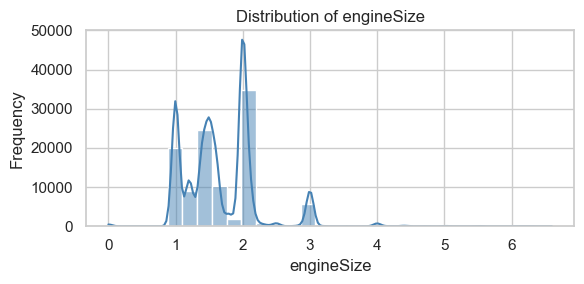


  → Observations from the Histograms: 

  • price, mileage, and engineSize are informative continuous predictors.

  • tax may be weak due to low variability.

  • mpg provides efficiency insight but likely interacts with engineSize and fuelType.



In [6]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print("""
  → Observations from the Histograms: 
      
  • price, mileage, and engineSize are informative continuous predictors.
      
  • tax may be weak due to low variability.
      
  • mpg provides efficiency insight but likely interacts with engineSize and fuelType.
""")



==== Fuel Type Counts ====
fuelType
Petrol      59875
Diesel      45177
Hybrid       3229
Other         253
Electric        6
Name: count, dtype: int64

==== Transmission Type Counts ====
transmission
Manual       61308
Semi-Auto    24903
Automatic    22319
Other           10
Name: count, dtype: int64


/var/folders/kt/m6vfspfs6vqckjq5st37k55m0000gp/T/ipykernel_87392/2975531255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fuelType", order=df["fuelType"].value_counts().index, palette="pastel")


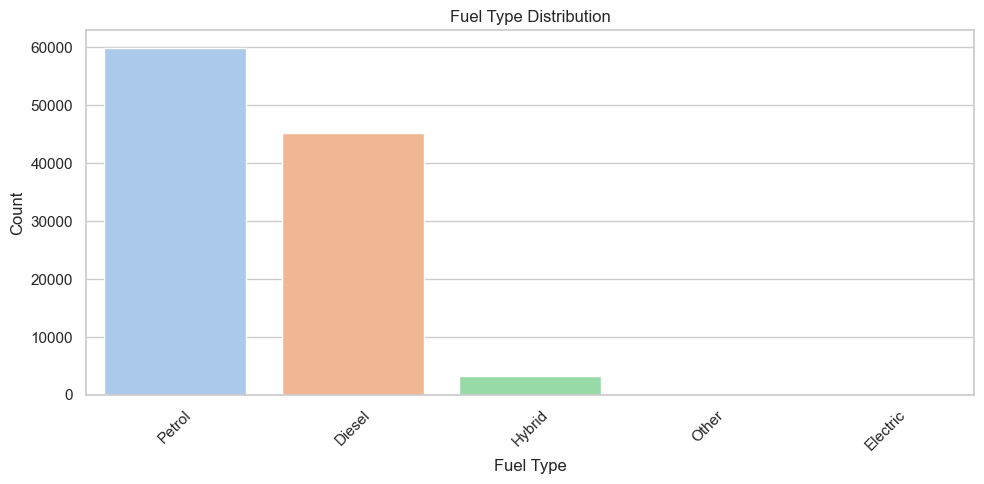

/var/folders/kt/m6vfspfs6vqckjq5st37k55m0000gp/T/ipykernel_87392/2975531255.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="transmission", order=df["transmission"].value_counts().index, palette="pastel")


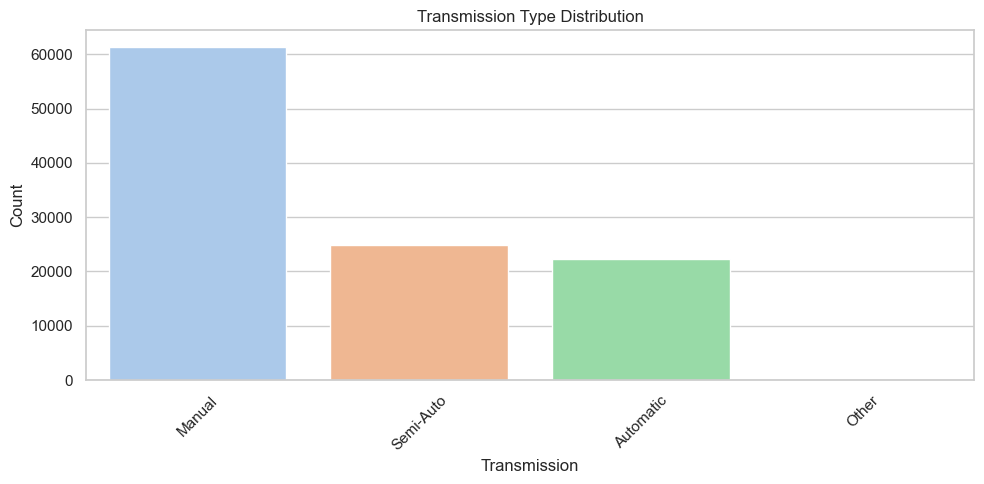

Since the number of cars for the other category in Fuel and transmission type is very small we will drop these columns 


In [7]:
# Frequency tables
print("==== Fuel Type Counts ====")
print(df["fuelType"].value_counts())
print("\n==== Transmission Type Counts ====")
print(df["transmission"].value_counts())

# Fuel Type Plot
sns.countplot(data=df, x="fuelType", order=df["fuelType"].value_counts().index, palette="pastel")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Transmission Type Plot
sns.countplot(data=df, x="transmission", order=df["transmission"].value_counts().index, palette="pastel")
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print( "Since the number of cars for the other category in Fuel and transmission type is very small we will drop these columns "

)

#### 4. Outlier Detection

In [8]:
summary = []
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    summary.append([col, outliers, round(outliers/len(df)*100, 2), round(lower, 2), round(upper, 2)])

outlier_table = pd.DataFrame(summary, columns=['column', 'outliers', 'percent_outliers', 'lower_bound', 'upper_bound'])
display(outlier_table.sort_values('percent_outliers', ascending=False))


print("""
→ Observations from Outlier Analysis:

• The 'year' column contains a few entries later than 2019, which is impossible 
  given the dataset’s collection year — these will need to be removed.

• Several older entries (pre-1990) exist. On inspection, they belong mainly to 
  Mercedes and Vauxhall, both of which have legitimate vintage models. 
  These are not errors but special cases.

• In feature engineering, we can flag such vehicles as a separate 'vintage' 
  category alongside existing body-type labels (e.g., sedan, SUV). 
  This will help preserve valid high-value classics without distorting 
  the year-price relationship.
""")

,column,outliers,percent_outliers,lower_bound,upper_bound
3,tax,27445,25.29,95.00,175.00
2,mileage,4360,4.02,-29624.62,69352.38
1,price,3898,3.59,-5836.25,37005.75
0,year,1946,1.79,2011.50,2023.50
4,mpg,939,0.87,23.55,86.35
5,engineSize,755,0.70,-0.00,3.20



→ Observations from Outlier Analysis:

• The 'year' column contains a few entries later than 2019, which is impossible 
  given the dataset’s collection year — these will need to be removed.

• Several older entries (pre-1990) exist. On inspection, they belong mainly to 
  Mercedes and Vauxhall, both of which have legitimate vintage models. 
  These are not errors but special cases.

• In feature engineering, we can flag such vehicles as a separate 'vintage' 
  category alongside existing body-type labels (e.g., sedan, SUV). 
  This will help preserve valid high-value classics without distorting 
  the year-price relationship.



#### 5. Variable Relationships 


==== Correlation Matrix (Numeric Columns) ====


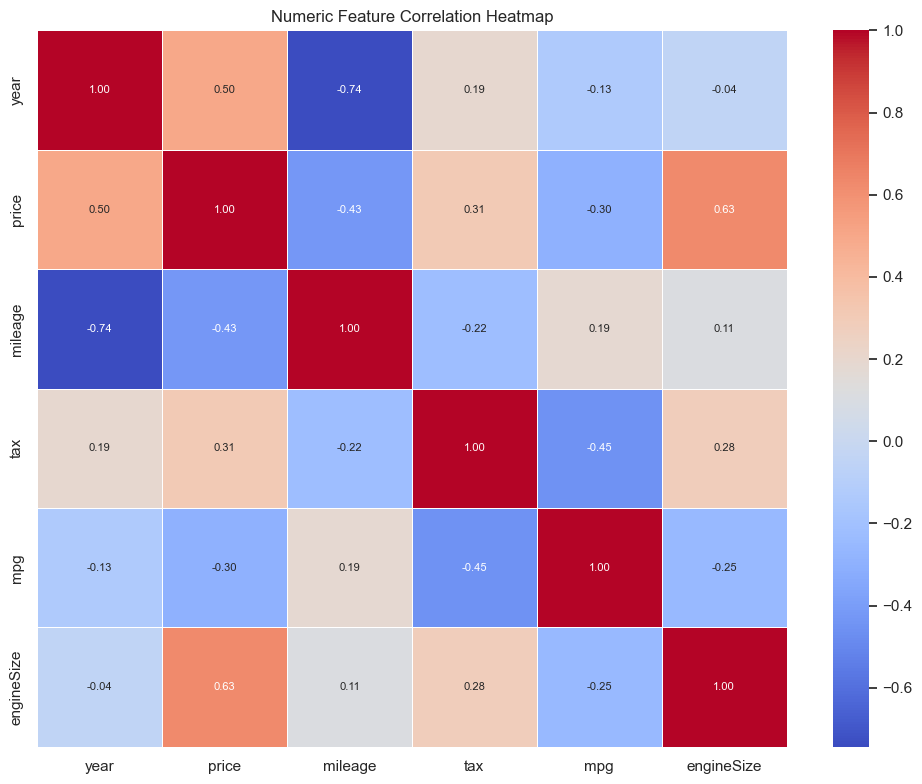


  → Observations from Correlation Matrix:

  • Mileage and engineSize are the most predictive continuous variables.

  • mpg and tax can be retained for completeness but may require transformation 
    or interaction features for stronger impact.



In [9]:
print("\n==== Correlation Matrix (Numeric Columns) ====")
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size':8}, linewidths=0.5)
plt.title('Numeric Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("""
  → Observations from Correlation Matrix:
      
  • Mileage and engineSize are the most predictive continuous variables.
      
  • mpg and tax can be retained for completeness but may require transformation 
    or interaction features for stronger impact.
""")

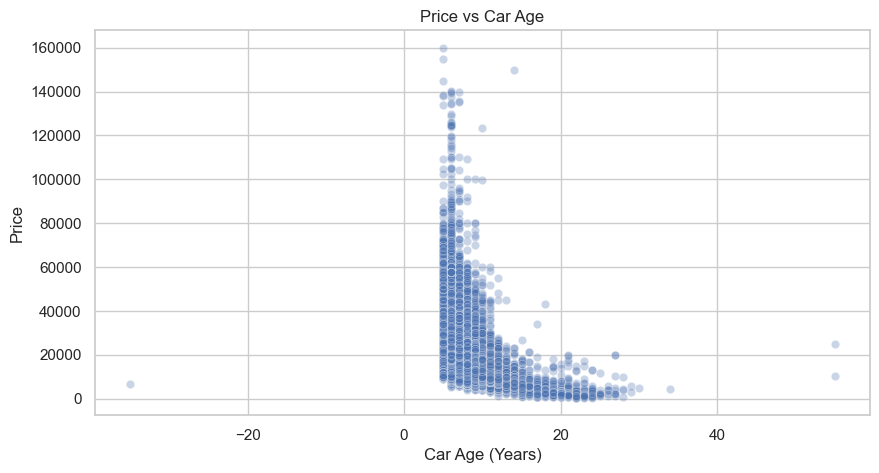

→ Older cars cheaper.


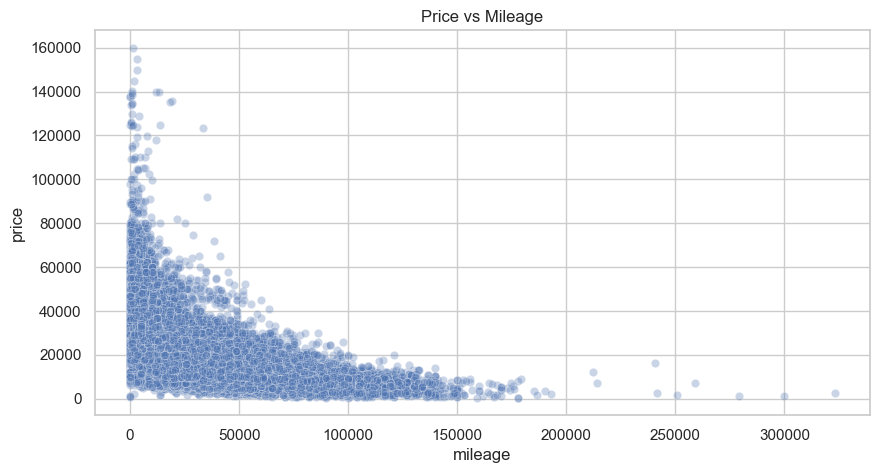

Correlation (price vs mileage): -0.428


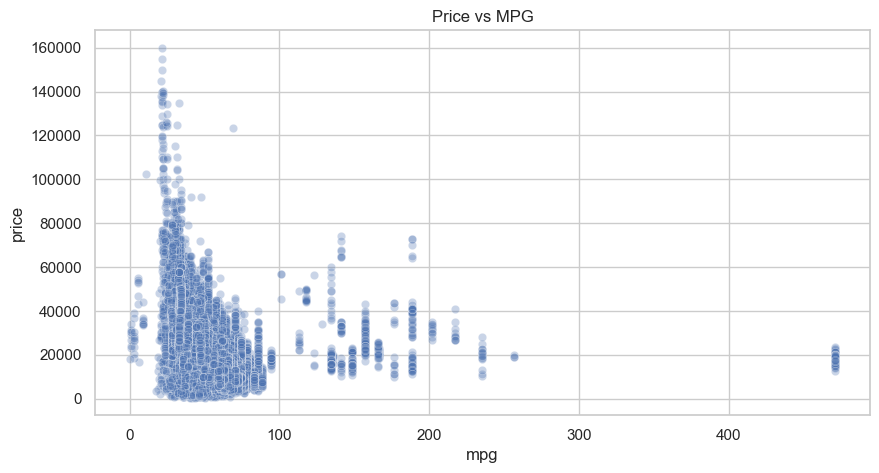

→ higher mpg (efficient cars) → lower price.


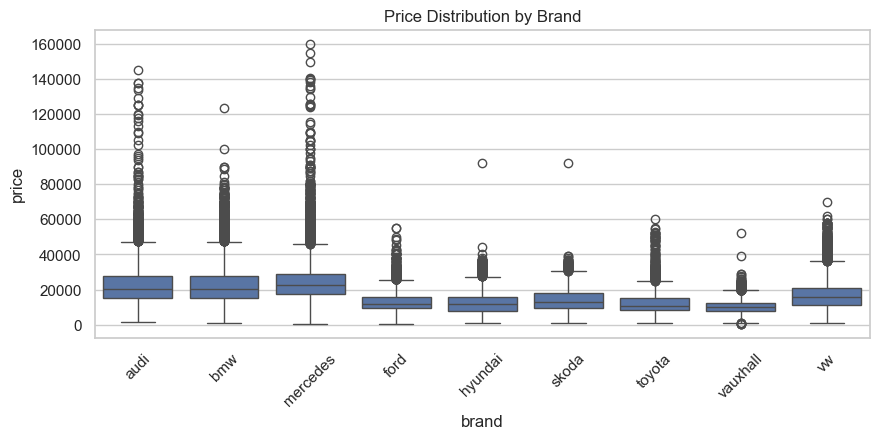

brand
mercedes    22505.0
bmw         20462.0
audi        20200.0
vw          15497.0
skoda       12998.0
hyundai     11990.0
ford        11750.0
toyota      10795.0
vauxhall     9999.0
Name: price, dtype: float64

→ Mercedes, BMW, Audi are top brands by median price.


In [10]:
# --- 5A. Price vs Age (Non-destructive calculation) ---
if 'year' in df.columns:
    current_year = pd.Timestamp.now().year
    car_age = current_year - df['year']
    sns.scatterplot(x=car_age, y=df['price'], alpha=0.3)
    plt.title('Price vs Car Age')
    plt.xlabel('Car Age (Years)')
    plt.ylabel('Price')
    plt.show()
print('→ Older cars cheaper.')

# --- 5B. Price vs Mileage ---
if 'mileage' in df.columns:
    sns.scatterplot(data=df, x='mileage', y='price', alpha=0.3)
    plt.title('Price vs Mileage')
    plt.show()
    corr_val = df['price'].corr(df['mileage'])
print(f'Correlation (price vs mileage): {corr_val:.3f}')

# --- 5C. Price vs MPG ---
if 'mpg' in df.columns:
    sns.scatterplot(data=df, x='mpg', y='price', alpha=0.3)
    plt.title('Price vs MPG')
    plt.show()
print('→ higher mpg (efficient cars) → lower price.')


# --- 5D. Price vs Brand ---
if 'brand' in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x='brand', y='price')
    plt.xticks(rotation=45)
    plt.title('Price Distribution by Brand')
    plt.show()


brand_summary = df.groupby('brand')['price'].median().sort_values(ascending=False)
display(brand_summary.head(10))
print('→ Mercedes, BMW, Audi are top brands by median price.')

In [11]:
# --- END ---
print("\nEDA complete. Dataset ready for feature engineering and modeling.")


EDA complete. Dataset ready for feature engineering and modeling.
